In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
import time


In [238]:
df = pd.read_csv("/Users/mikeredshaw/Documents/Python Models/UFC/ufc-master.csv")

In [239]:
import pandas as pd

# Increase the maximum columns display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Now, when you print df.dtypes, it will show all 119 columns with their data types
print(df.dtypes)

R_fighter                        object
B_fighter                        object
R_odds                          float64
B_odds                            int64
R_ev                            float64
B_ev                            float64
date                             object
location                         object
country                          object
Winner                           object
title_bout                         bool
weight_class                     object
gender                           object
no_of_rounds                      int64
B_current_lose_streak             int64
B_current_win_streak              int64
B_draw                            int64
B_avg_SIG_STR_landed            float64
B_avg_SIG_STR_pct               float64
B_avg_SUB_ATT                   float64
B_avg_TD_landed                 float64
B_avg_TD_pct                    float64
B_longest_win_streak              int64
B_losses                          int64
B_total_rounds_fought             int64


In [240]:
df['date'] = pd.to_datetime(df['date'])

In [241]:
df.dtypes

R_fighter                               object
B_fighter                               object
R_odds                                 float64
B_odds                                   int64
R_ev                                   float64
B_ev                                   float64
date                            datetime64[ns]
location                                object
country                                 object
Winner                                  object
title_bout                                bool
weight_class                            object
gender                                  object
no_of_rounds                             int64
B_current_lose_streak                    int64
B_current_win_streak                     int64
B_draw                                   int64
B_avg_SIG_STR_landed                   float64
B_avg_SIG_STR_pct                      float64
B_avg_SUB_ATT                          float64
B_avg_TD_landed                        float64
B_avg_TD_pct 

In [242]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [243]:
df['Winner'] = df['Winner'].map({'Red': 1, 'Blue': 2})

In [244]:
df = df.rename(columns={"y": "term_deposit"})

In [245]:
df_men = df[df['gender'] == 'MALE'].copy()
df_women = df[df['gender'] == 'FEMALE'].copy()

In [246]:
df['no_of_rounds'].unique()

array([5, 3, 4])

In [247]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)

In [248]:
df_men.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,1,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,2,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,2,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,1,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [249]:
cat_columns = ['location', 'country', 'title_bout', 'weight_class', 'gender', 'no_of_rounds', 'B_Stance', 'R_Stance', 'better_rank']
num_columns = ['B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed','B_avg_SIG_STR_pct','B_avg_SUB_ATT',	'B_avg_TD_landed',	'B_avg_TD_pct',	'B_longest_win_streak',	'B_losses',	'B_total_rounds_fought',	'B_total_title_bouts',	'B_win_by_Decision_Majority','B_win_by_Decision_Split', 	'B_win_by_Decision_Unanimous',	'B_win_by_KO/TKO',	'B_win_by_Submission',	'B_win_by_TKO_Doctor_Stoppage',	'B_wins', 'B_Height_cms','B_Reach_cms',	'B_Weight_lbs',
               'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed','R_avg_SIG_STR_pct','R_avg_SUB_ATT',	'R_avg_TD_landed',	'R_avg_TD_pct',	'R_longest_win_streak',	'R_losses',	'R_total_rounds_fought',	'R_total_title_bouts',	'R_win_by_Decision_Majority','R_win_by_Decision_Split', 	'R_win_by_Decision_Unanimous',	'R_win_by_KO/TKO',	'R_win_by_Submission',	'R_win_by_TKO_Doctor_Stoppage',	'R_wins', 'R_Height_cms','R_Reach_cms',	'R_Weight_lbs',
                'R_age','B_age', 'lose_streak_dif',	'win_streak_dif',	'longest_win_streak_dif',	'win_dif',	'loss_dif',	'total_round_dif',	'total_title_bout_dif',	'ko_dif',	'sub_dif',	'height_dif',	'reach_dif', 'age_dif','sig_str_dif',	'avg_sub_att_dif',	'avg_td_dif',	'B_match_weightclass_rank',	'R_match_weightclass_rank',
                'R_odds', 'B_odds', 'R_ev', 'B_ev']
target = 'Winner'

In [250]:
from sklearn.impute import SimpleImputer

In [251]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values using the mean
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [252]:
X_train, X_test, y_train, y_test = train_test_split(df_men[cat_columns + num_columns], df_men[target], test_size=0.2, random_state=42)

In [253]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [254]:
params_knn = {'n_neighbors': [3, 5, 7, 20, 30, 50]}
knn = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(knn, params_knn, cv=3, scoring='recall')

random_search_knn.fit(X_train_preprocessed, y_train)
best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_knn.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Best parameters found:  {'n_neighbors': 50}
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.84      0.74       518
           2       0.63      0.38      0.47       359

    accuracy                           0.65       877
   macro avg       0.64      0.61      0.61       877
weighted avg       0.65      0.65      0.63       877



In [255]:
rf_param = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

rf= RandomForestClassifier()

random_search_rf = RandomizedSearchCV(rf, rf_param, cv=3, scoring= 'recall')

random_search_rf.fit(X_train_preprocessed, y_train)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_rf.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best parameters found:  {'n_estimators': 100, 'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.78      0.72       518
           2       0.58      0.45      0.51       359

    accuracy                           0.64       877
   macro avg       0.63      0.61      0.61       877
weighted avg       0.63      0.64      0.63       877



In [256]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [257]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [258]:
# Create dictionary to store the results of each model
results = {}

In [259]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.626750  0.777992  0.694229  0.595211  1.331919
Logistic Regression   0.674825  0.745174  0.708257  0.637400  0.066435
Decision Tree         0.664016  0.644788  0.654261  0.597491  0.190325
Random Forest         0.671717  0.770270  0.717626  0.641961  1.143637
AdaBoost              0.670232  0.725869  0.696942  0.627138  0.392478
Bagging               0.649038  0.781853  0.709282  0.621437  1.283060
Voting                0.667221  0.774131  0.716711  0.638540  1.512537


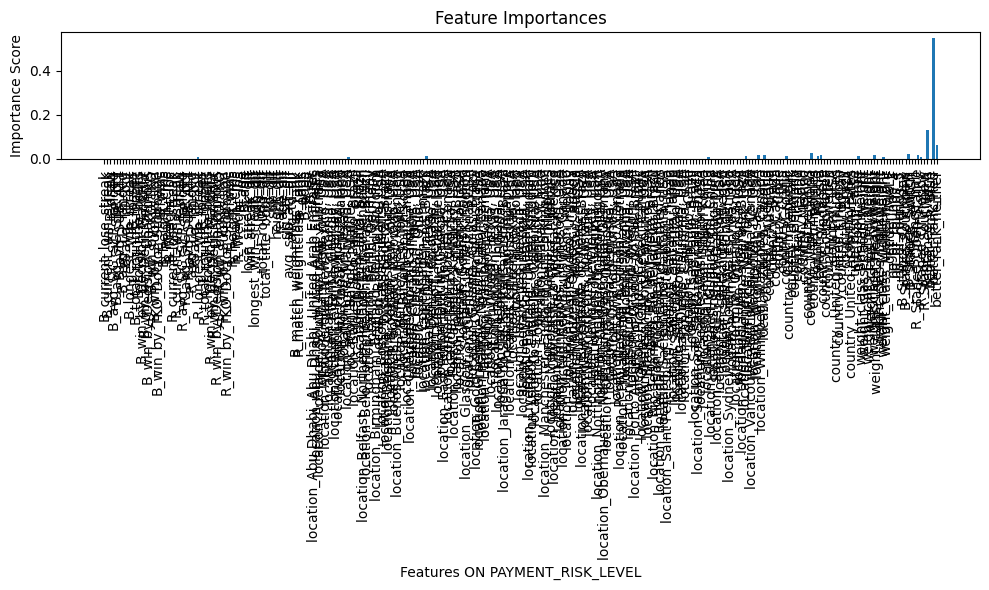

In [266]:
param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
grid_search.fit(X_train_preprocessed, y_train)

best_model = grid_search.best_estimator_

# Step 4: Get Feature Importances from the Best Model
feature_importances = best_model.feature_importances_

# Get feature names from one-hot encoder
onehot_columns = list(preprocessor.named_transformers_['cat'].named_steps['onehot']
                     .get_feature_names_out(cat_columns))

# Combine the lists for numerical and one-hot encoded columns
all_feature_names = num_columns + onehot_columns


# Step 5: Visualize Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(all_feature_names, feature_importances)
plt.xlabel('Features ON PAYMENT_RISK_LEVEL')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [267]:
import pandas as pd

# Combine the feature names and their corresponding importances into a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame based on the importances
sorted_feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(sorted_feature_imp_df)


                                               Feature  Importance
265                                    better_rank_Red    0.546313
263                                    R_Stance_Switch    0.133022
266                                better_rank_neither    0.062630
226                               country_ New Zealand    0.026195
257                                    B_Stance_Switch    0.024531
246                           weight_class_Heavyweight    0.019206
260                               R_Stance_Open Stance    0.018610
229                                    country_ Russia    0.017818
209                      location_Wichita, Kansas, USA    0.017021
211                           location_Zagreb, Croatia    0.016202
103                  location_Curitiba, Parana, Brazil    0.014750
218                                   country_ Croatia    0.014197
241                                    title_bout_True    0.013634
205                  location_Uniondale, New York, USA    0.01